In [1]:
import numpy
import matplotlib.pyplot as plt
import modules.SimulacaoKTz as ktzsim
np = numpy

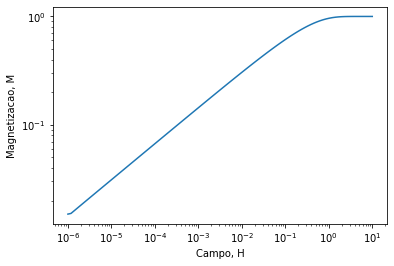

In [3]:

#define parametros fase ferromagnetica (ver diagrama KT no plano de trabalho)

K             = 0.0
T             = 1.0
delta         = 0.0
lamb          = 0.0
xR            = 0.0
t_transiente  = 10000
t_total       = 20000
x0            = numpy.array([1.0,1.0],dtype=numpy.float64)
H_valores     = np.logspace(-6,1,100)
mapa_nome     = 'kttanh'



x       = ktzsim.RodaSimulacao_Varios_H(K,T,delta,lamb,xR,H_valores,t_transiente,t_total,x0,mapa_nome,num_repete_bootstrap=0)[0]

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(H_valores,x)
ax.set_xlabel('Campo, H')
ax.set_ylabel('Magnetizacao, M')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()


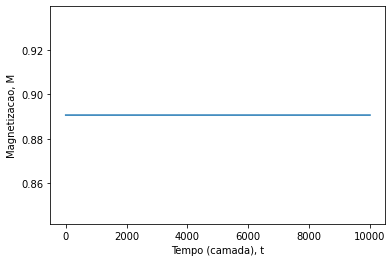

In [4]:

#define parametros fase ferromagnetica (ver diagrama KT no plano de trabalho)

K     = 0.2
T     = 0.5
delta = 0.0
lamb  = 0.0
xR    = 0.0
H     = 0.0
t_transiente = 10000
t_total      = 20000
x0           = numpy.array([1.0,1.0],dtype=numpy.float64)
mapa_nome    = 'kttanh'



x       = ktzsim.RodaSimulacaoMapa(K,T,delta,lamb,xR,H,t_transiente,t_total,x0,mapa_nome)
t_dados = np.arange(x.shape[0])

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(t_dados,x[:,0])
ax.set_xlabel('Tempo (camada), t')
ax.set_ylabel('Magnetizacao, M')
plt.show()


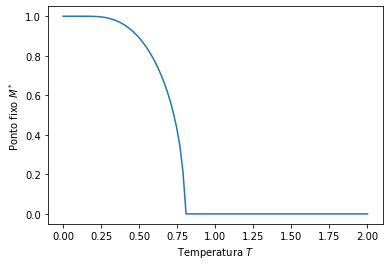

In [7]:
K     = 0.2
T     = 0.5
delta = 0.0
lamb  = 0.0
xR    = 0.0
H     = 0.0
t_transiente = 10000
t_total      = 20000
x0           = numpy.array([1.0,1.0],dtype=numpy.float64)
mapa_nome    = 'kttanh'


def lineariza_lista(lst):
    return [ m for m_l in lst for m in m_l ]

T_valores = np.linspace(0.0001,2,100)

x_dados = []
T_dados = []
for T in T_valores:
    x  = ktzsim.RodaSimulacaoMapa(K,T,delta,lamb,xR,H,t_transiente,t_total,x0,mapa_nome)
    x_unico = np.unique(x[:,0])
    x_dados.append(x_unico)
    T_dados.append(T * np.ones(x_unico.size))

T_dados = np.array(lineariza_lista(T_dados))
x_dados = np.array(lineariza_lista(x_dados))

plt.plot(T_dados,x_dados,'-')
plt.xlabel(r'Temperatura $T$')
plt.ylabel(r'Ponto fixo $M^*$')
plt.show()

K = 0.0
K = 0.3
K = 0.5


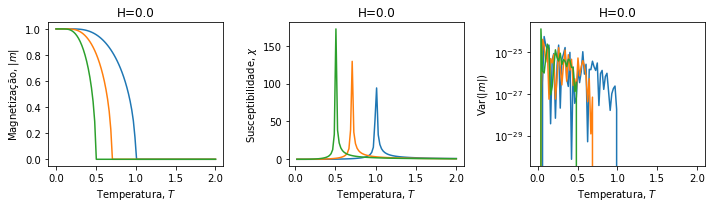

In [8]:
K_valores        = [ 0.0, 0.3, 0.5 ] #[ 0.0, 0.3, 0.5, 0.6, 1.5 ]
T_valores        = np.linspace(0.001,2,100) #T     = 0.5
delta            = 0.0
lamb             = 0.0
xR               = 0.0
H                = 0.0000
t_transiente     = 10000
t_total          = 20000
x0               = numpy.array([1.0,1.0],dtype=numpy.float64)
mapa_nome        = 'kttanh'
usar_modulo_de_m = True


xm_dados, xvar_dados, xvarstd_dados, xsuscept_dados = [],[],[],[]

for K in K_valores:
    print('K =', K)
    x_media, x_var, x_var_std, x_suscept = ktzsim.RodaSimulacao_Varios_T(K,T_valores,delta,lamb,xR,H,t_transiente,t_total,x0,mapa_nome,seguir_ponto_fixo=True,usar_modulo_de_m=usar_modulo_de_m,num_repete_bootstrap=0)
    xm_dados.append(       x_media   )
    xvar_dados.append(     x_var     )
    xvarstd_dados.append(  x_var_std )
    xsuscept_dados.append( x_suscept )

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,3))
for i,K in enumerate(K_valores):
    ax[0].plot(T_valores,         xm_dados[i]           , label=f'K={K}')
    ax[1].plot(T_valores,   xsuscept_dados[i]           , label=f'K={K}')
    ax[2].plot(T_valores,       xvar_dados[i]/T_valores , label=f'K={K}')
ax[0].set_xlabel( 'Temperatura, $T$')
ax[0].set_ylabel( 'Magnetização, $|m|$')
ax[0].set_title( f'H={H}')
ax[1].set_xlabel( 'Temperatura, $T$')
ax[1].set_ylabel(r'Susceptibilidade, $\chi$')
ax[1].set_title( f'H={H}')
ax[2].set_xlabel( 'Temperatura, $T$')
ax[2].set_ylabel(r'Var($|m|$)')
ax[2].set_title( f'H={H}')
ax[2].set_yscale('log')

plt.tight_layout()
plt.show()

K = 0.0


d:\Dropbox\p\ufsc\pesquisa\simulacoes\mapa_ktz_py\modules\SimulacaoKTz.py:51: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  x_dados1       = RodaSimulacaoMapa(K,T,delta,lamb,xR,H,t_transiente,t_total,x0,mapa_nome)


K = 0.3
K = 0.5
K = 0.6
K = 1.5


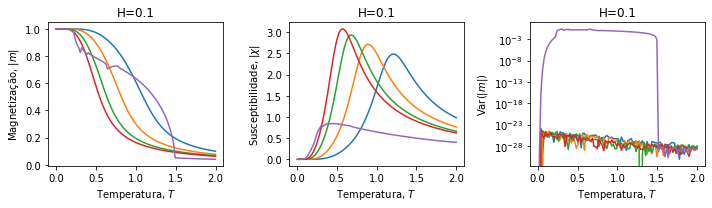

In [1]:
import numpy
import matplotlib.pyplot as plt
import modules.SimulacaoKTz as ktzsim
np = numpy

K_valores        = [ 0.0, 0.3, 0.5, 0.6, 1.5 ]
T_valores        = np.linspace(0.001,2,100) #T     = 0.5
delta            = 0.0
lamb             = 0.0
xR               = 0.0
H                = 0.1
t_transiente     = 10000
t_total          = 20000
x0               = numpy.array([1.0,1.0],dtype=numpy.float64)
mapa_nome        = 'kttanh'
usar_modulo_de_m = True


xm_dados, xvar_dados, xvarstd_dados, xsuscept_dados = [],[],[],[]

for K in K_valores:
    print('K =',K)
    x_media, x_var, x_var_std, x_suscept = ktzsim.RodaSimulacao_Varios_T(K,T_valores,delta,lamb,xR,H,t_transiente,t_total,x0,mapa_nome,seguir_ponto_fixo=True,usar_modulo_de_m=usar_modulo_de_m,num_repete_bootstrap=0)
    xm_dados.append(       x_media   )
    xvar_dados.append(     x_var     )
    xvarstd_dados.append(  x_var_std )
    xsuscept_dados.append( x_suscept )

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,3))
for i,K in enumerate(K_valores):
    ax[0].plot(T_valores,       xm_dados[i]           , label=f'K={K}')
    ax[1].plot(T_valores, np.abs(xsuscept_dados[i])   , label=f'K={K}')
    ax[2].plot(T_valores,     xvar_dados[i]/T_valores , label=f'K={K}')
ax[0].set_xlabel( 'Temperatura, $T$')
ax[0].set_ylabel( 'Magnetização, $|m|$')
ax[0].set_title( f'H={H}')
ax[1].set_xlabel( 'Temperatura, $T$')
ax[1].set_ylabel(r'Susceptibilidade, $|\chi|$')
ax[1].set_title( f'H={H}')
ax[2].set_xlabel( 'Temperatura, $T$')
ax[2].set_ylabel(r'Var($|m|$)')
ax[2].set_title( f'H={H}')
ax[2].set_yscale('log')

plt.tight_layout()
plt.show()